In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from statsmodels.formula.api import ols
import math

In [21]:
import matplotlib
from matplotlib import font_manager, rc
import platform

if platform.system() == 'Windows':
# 윈도우인 경우
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
else:    
# Mac 인 경우
    rc('font', family='AppleGothic')
    
matplotlib.rcParams['axes.unicode_minus'] = False   
#그래프에서 마이너스 기호가 표시되도록 하는 설정입니다.

In [22]:
shortterm_frgn = pd.read_csv("02-3_SHORT_TERM_FRGN.csv", encoding='cp949')

In [23]:
shorttermfrgn = pd.get_dummies(shortterm_frgn, columns = ['nationality'])

In [24]:
shorttermfrgn['CHN_visit_pop_cnt'] = shorttermfrgn['nationality_CHN']*shorttermfrgn['visit_pop_cnt']
shorttermfrgn['ETC_visit_pop_cnt'] = shorttermfrgn['nationality_ETC']*shorttermfrgn['visit_pop_cnt']
shorttermfrgn['HKG_visit_pop_cnt'] = shorttermfrgn['nationality_HKG']*shorttermfrgn['visit_pop_cnt']
shorttermfrgn['IDN_visit_pop_cnt'] = shorttermfrgn['nationality_IDN']*shorttermfrgn['visit_pop_cnt']
shorttermfrgn['JPN_visit_pop_cnt'] = shorttermfrgn['nationality_JPN']*shorttermfrgn['visit_pop_cnt']
shorttermfrgn['MYS_visit_pop_cnt'] = shorttermfrgn['nationality_MYS']*shorttermfrgn['visit_pop_cnt']
shorttermfrgn['SGP_visit_pop_cnt'] = shorttermfrgn['nationality_SGP']*shorttermfrgn['visit_pop_cnt']
shorttermfrgn['THA_visit_pop_cnt'] = shorttermfrgn['nationality_THA']*shorttermfrgn['visit_pop_cnt']
shorttermfrgn['USA_visit_pop_cnt'] = shorttermfrgn['nationality_USA']*shorttermfrgn['visit_pop_cnt']
shorttermfrgn['VNM_visit_pop_cnt'] = shorttermfrgn['nationality_VNM']*shorttermfrgn['visit_pop_cnt']

In [25]:
shorttermfrgn = shorttermfrgn.drop(['time', 'city', 'emd_cd', 'visit_pop_cnt', 'nationality_CHN', 'nationality_ETC', 'nationality_HKG', 'nationality_IDN', 'nationality_JPN', 'nationality_MYS', 'nationality_SGP', 'nationality_THA', 'nationality_USA', 'nationality_VNM'], axis=1)

In [26]:
shorttermfrgn

,base_date,emd_nm,CHN_visit_pop_cnt,ETC_visit_pop_cnt,HKG_visit_pop_cnt,IDN_visit_pop_cnt,JPN_visit_pop_cnt,MYS_visit_pop_cnt,SGP_visit_pop_cnt,THA_visit_pop_cnt,USA_visit_pop_cnt,VNM_visit_pop_cnt
0,2018-01-01,한림읍,66.3170,0.0000,0.0000,0.0,0.0000,0.0,0.0,0.0,0.0000,0.0
1,2018-01-01,한림읍,0.0000,21.1308,0.0000,0.0,0.0000,0.0,0.0,0.0,0.0000,0.0
2,2018-01-01,한림읍,0.0000,0.0000,3.6771,0.0,0.0000,0.0,0.0,0.0,0.0000,0.0
3,2018-01-01,한림읍,0.0000,0.0000,0.0000,0.0,5.5962,0.0,0.0,0.0,0.0000,0.0
4,2018-01-01,한림읍,0.0000,0.0000,0.0000,0.0,0.0000,0.0,0.0,0.0,3.9078,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
6059039,2021-06-30,중문동,0.0000,0.0000,0.0000,0.0,0.0000,0.0,0.0,0.0,9.2120,0.0
6059040,2021-06-30,중문동,0.6039,0.0000,0.0000,0.0,0.0000,0.0,0.0,0.0,0.0000,0.0
6059041,2021-06-30,중문동,0.0000,11.5473,0.0000,0.0,0.0000,0.0,0.0,0.0,0.0000,0.0
6059042,2021-06-30,예래동,0.2013,0.0000,0.0000,0.0,0.0000,0.0,0.0,0.0,0.0000,0.0


In [28]:
shorttermfrgn = shorttermfrgn.groupby(['base_date', 'emd_nm']).sum().reset_index()

In [29]:
shorttermfrgn

,base_date,emd_nm,CHN_visit_pop_cnt,ETC_visit_pop_cnt,HKG_visit_pop_cnt,IDN_visit_pop_cnt,JPN_visit_pop_cnt,MYS_visit_pop_cnt,SGP_visit_pop_cnt,THA_visit_pop_cnt,USA_visit_pop_cnt,VNM_visit_pop_cnt
0,2018-01-01,건입동,1424.3743,258.8518,264.7481,483.0000,509.2529,517.3762,130.6880,23.4566,1.9539,1163.4608
1,2018-01-01,구좌읍,951.5048,63.3919,14.7082,0.0000,251.8285,142.8572,63.3636,832.7089,46.8936,0.0000
2,2018-01-01,남원읍,1796.3264,625.9995,36.7705,92.0000,89.5392,208.4948,130.6873,0.0000,85.9717,486.5374
3,2018-01-01,노형동,6525.0196,808.2527,143.4054,115.0000,777.8702,536.6814,174.2505,70.3697,80.1103,423.0760
4,2018-01-01,대륜동,438.2685,221.8731,77.2191,57.5000,291.0024,235.5223,19.8010,0.0000,5.8617,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...
53711,2021-06-30,표선면,1.8117,81.2925,0.1326,3.0006,0.0000,0.0000,0.0000,0.4400,2.7636,0.4192
53712,2021-06-30,한경면,0.0000,6.9285,0.0000,0.0000,0.0000,0.0000,0.0000,0.0352,5.5272,0.0000
53713,2021-06-30,한림읍,20.3296,27.2521,0.0000,4.0008,0.0000,0.0000,0.0000,0.1584,21.1876,0.0000
53714,2021-06-30,화북동,1.4091,0.0000,0.0332,0.0000,0.0000,0.0000,0.0000,0.0000,42.3752,0.0000


In [31]:
shorttermfrgn['base_date'] = pd.to_datetime(shorttermfrgn['base_date'])

In [38]:
train = shorttermfrgn[shorttermfrgn['base_date']<='2020-12-31']

In [39]:
train

,base_date,emd_nm,CHN_visit_pop_cnt,ETC_visit_pop_cnt,HKG_visit_pop_cnt,IDN_visit_pop_cnt,JPN_visit_pop_cnt,MYS_visit_pop_cnt,SGP_visit_pop_cnt,THA_visit_pop_cnt,USA_visit_pop_cnt,VNM_visit_pop_cnt
0,2018-01-01,건입동,1424.3743,258.8518,264.7481,483.0000,509.2529,517.3762,130.6880,23.4566,1.9539,1163.4608
1,2018-01-01,구좌읍,951.5048,63.3919,14.7082,0.0000,251.8285,142.8572,63.3636,832.7089,46.8936,0.0000
2,2018-01-01,남원읍,1796.3264,625.9995,36.7705,92.0000,89.5392,208.4948,130.6873,0.0000,85.9717,486.5374
3,2018-01-01,노형동,6525.0196,808.2527,143.4054,115.0000,777.8702,536.6814,174.2505,70.3697,80.1103,423.0760
4,2018-01-01,대륜동,438.2685,221.8731,77.2191,57.5000,291.0024,235.5223,19.8010,0.0000,5.8617,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...
46505,2020-12-31,표선면,3.2386,80.5770,0.0000,0.5714,20.4543,2.3232,0.0000,0.7961,13.0250,0.0000
46506,2020-12-31,한경면,0.1850,229.6810,0.0000,0.5714,0.0000,0.0000,0.0000,0.3377,5.2100,0.0000
46507,2020-12-31,한림읍,9.9944,67.7754,0.0000,2.2856,0.0000,0.0000,0.0000,0.0241,0.0000,0.0000
46508,2020-12-31,화북동,0.0000,7.5310,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000


In [40]:
test = shorttermfrgn[shorttermfrgn['base_date']>'2020-12-31']

In [41]:
test

,base_date,emd_nm,CHN_visit_pop_cnt,ETC_visit_pop_cnt,HKG_visit_pop_cnt,IDN_visit_pop_cnt,JPN_visit_pop_cnt,MYS_visit_pop_cnt,SGP_visit_pop_cnt,THA_visit_pop_cnt,USA_visit_pop_cnt,VNM_visit_pop_cnt
46510,2021-01-01,건입동,4.5480,27.4620,0.0000,0.0000,0.0000,0.00,0.0,0.1425,1.8105,0.0000
46511,2021-01-01,구좌읍,3.2973,0.8955,0.0000,0.0000,0.0000,0.00,0.0,0.0000,0.0000,0.0000
46512,2021-01-01,남원읍,83.3500,962.3666,6.6643,3.4529,4.6669,19.48,0.0,4.6462,284.8635,0.0000
46513,2021-01-01,노형동,15.9203,26.2680,0.4275,0.0000,0.0000,0.00,0.0,0.1869,15.0875,0.0000
46514,2021-01-01,대륜동,0.7959,7.1640,0.5985,0.0000,0.0000,0.00,0.0,0.1335,13.8805,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...
53711,2021-06-30,표선면,1.8117,81.2925,0.1326,3.0006,0.0000,0.00,0.0,0.4400,2.7636,0.4192
53712,2021-06-30,한경면,0.0000,6.9285,0.0000,0.0000,0.0000,0.00,0.0,0.0352,5.5272,0.0000
53713,2021-06-30,한림읍,20.3296,27.2521,0.0000,4.0008,0.0000,0.00,0.0,0.1584,21.1876,0.0000
53714,2021-06-30,화북동,1.4091,0.0000,0.0332,0.0000,0.0000,0.00,0.0,0.0000,42.3752,0.0000


In [63]:
한림읍_train = train[train['emd_nm']=='한림읍']
애월읍_train = train[train['emd_nm']=='애월읍']
구좌읍_train = train[train['emd_nm']=='구좌읍']
조천읍_train = train[train['emd_nm']=='조천읍']
한경면_train = train[train['emd_nm']=='한경면']
일도1동_train = train[train['emd_nm']=='일도1동']
일도2동_train = train[train['emd_nm']=='일도2동']
이도1동_train = train[train['emd_nm']=='이도1동']
이도2동_train = train[train['emd_nm']=='이도2동']
삼도1동_train = train[train['emd_nm']=='삼도1동']
삼도2동_train = train[train['emd_nm']=='삼도2동']
용담1동_train = train[train['emd_nm']=='용담1동']
용담2동_train = train[train['emd_nm']=='용담2동']
건입동_train = train[train['emd_nm']=='건입동']
화북동_train = train[train['emd_nm']=='화북동']
삼양동_train = train[train['emd_nm']=='삼양동']
봉개동_train = train[train['emd_nm']=='봉개동']
아라동_train = train[train['emd_nm']=='아라동']
오라동_train = train[train['emd_nm']=='오라동']
연동_train = train[train['emd_nm']=='연동']
노형동_train = train[train['emd_nm']=='노형동']
외도동_train = train[train['emd_nm']=='외도동']
이호동_train = train[train['emd_nm']=='이호동']
도두동_train = train[train['emd_nm']=='도두동']
대정읍_train = train[train['emd_nm']=='대정읍']
남원읍_train = train[train['emd_nm']=='남원읍']
성산읍_train = train[train['emd_nm']=='성산읍']
안덕면_train = train[train['emd_nm']=='안덕면']
표선면_train = train[train['emd_nm']=='표선면']
송산동_train = train[train['emd_nm']=='송산동']
정방동_train = train[train['emd_nm']=='정방동']
중앙동_train = train[train['emd_nm']=='중앙동']
천지동_train = train[train['emd_nm']=='천지동']
효돈동_train = train[train['emd_nm']=='효돈동']
영천동_train = train[train['emd_nm']=='영천동']
동홍동_train = train[train['emd_nm']=='동홍동']
서홍동_train = train[train['emd_nm']=='서홍동']
대륜동_train = train[train['emd_nm']=='대륜동']
대천동_train = train[train['emd_nm']=='대천동']
중문동_train = train[train['emd_nm']=='중문동']
예래동_train = train[train['emd_nm']=='예래동']
알수없음_train = train[train['emd_nm']=='알수없음']

In [44]:
한림읍_test = test[test['emd_nm']=='한림읍']
애월읍_test = test[test['emd_nm']=='애월읍']
구좌읍_test = test[test['emd_nm']=='구좌읍']
조천읍_test = test[test['emd_nm']=='조천읍']
한경면_test = test[test['emd_nm']=='한경면']
일도1동_test = test[test['emd_nm']=='일도1동']
일도2동_test = test[test['emd_nm']=='일도2동']
이도1동_test = test[test['emd_nm']=='이도1동']
이도2동_test = test[test['emd_nm']=='이도2동']
삼도1동_test = test[test['emd_nm']=='삼도1동']
삼도2동_test = test[test['emd_nm']=='삼도2동']
용담1동_test = test[test['emd_nm']=='용담1동']
용담2동_test = test[test['emd_nm']=='용담2동']
건입동_test = test[test['emd_nm']=='건입동']
화북동_test = test[test['emd_nm']=='화북동']
삼양동_test = test[test['emd_nm']=='삼양동']
봉개동_test = test[test['emd_nm']=='봉개동']
아라동_test = test[test['emd_nm']=='아라동']
오라동_test = test[test['emd_nm']=='오라동']
연동_test = test[test['emd_nm']=='연동']
노형동_test = test[test['emd_nm']=='노형동']
외도동_test = test[test['emd_nm']=='외도동']
이호동_test = test[test['emd_nm']=='이호동']
도두동_test = test[test['emd_nm']=='도두동']
대정읍_test = test[test['emd_nm']=='대정읍']
남원읍_test = test[test['emd_nm']=='남원읍']
성산읍_test = test[test['emd_nm']=='성산읍']
안덕면_test = test[test['emd_nm']=='안덕면']
표선면_test = test[test['emd_nm']=='표선면']
송산동_test = test[test['emd_nm']=='송산동']
정방동_test = test[test['emd_nm']=='정방동']
중앙동_test = test[test['emd_nm']=='중앙동']
천지동_test = test[test['emd_nm']=='천지동']
효돈동_test = test[test['emd_nm']=='효돈동']
영천동_test = test[test['emd_nm']=='영천동']
동홍동_test = test[test['emd_nm']=='동홍동']
서홍동_test = test[test['emd_nm']=='서홍동']
대륜동_test = test[test['emd_nm']=='대륜동']
대천동_test = test[test['emd_nm']=='대천동']
중문동_test = test[test['emd_nm']=='중문동']
예래동_test = test[test['emd_nm']=='예래동']
알수없음_test = test[test['emd_nm']=='알수없음']

In [46]:
한림읍_train

,base_date,emd_nm,CHN_visit_pop_cnt,ETC_visit_pop_cnt,HKG_visit_pop_cnt,IDN_visit_pop_cnt,JPN_visit_pop_cnt,MYS_visit_pop_cnt,SGP_visit_pop_cnt,THA_visit_pop_cnt,USA_visit_pop_cnt,VNM_visit_pop_cnt
40,2018-01-01,한림읍,1332.1072,451.6704,36.7710,149.5000,145.5012,11.5830,19.8010,0.0000,29.3085,0.0
83,2018-01-02,한림읍,1098.5558,414.6911,0.0000,207.0000,67.1544,7.7220,7.9204,0.0000,13.6773,0.0
126,2018-01-03,한림읍,1147.5726,464.8773,0.0000,103.5000,55.9620,81.0811,47.5228,0.0000,3.9078,0.0
169,2018-01-04,한림읍,723.7202,211.3074,0.0000,0.0000,106.3278,65.6370,83.1650,35.1849,5.8617,0.0
212,2018-01-05,한림읍,645.8697,229.7966,7.3542,69.0000,167.8860,15.4440,31.6817,0.0000,0.0000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
46345,2020-12-27,한림읍,5.3673,34.6404,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0
46386,2020-12-28,한림읍,5.1824,36.8995,0.0000,0.0000,0.0000,3.0976,0.0000,0.5784,0.0000,0.0
46426,2020-12-29,한림읍,6.4774,29.3694,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,3.9075,0.0
46466,2020-12-30,한림읍,6.5702,25.6044,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0


In [64]:
한림읍_test

,base_date,emd_nm,CHN_visit_pop_cnt,ETC_visit_pop_cnt,HKG_visit_pop_cnt,IDN_visit_pop_cnt,JPN_visit_pop_cnt,MYS_visit_pop_cnt,SGP_visit_pop_cnt,THA_visit_pop_cnt,USA_visit_pop_cnt,VNM_visit_pop_cnt
46548,2021-01-01,한림읍,10.3471,0.5970,0.0,0.4968,0.0000,0.0,0.0,0.0000,3.6210,0.0000
46586,2021-01-02,한림읍,8.4138,0.0000,0.0,0.0000,0.0000,0.0,0.0,0.0979,15.6910,0.0000
46626,2021-01-03,한림읍,11.7118,0.0000,0.0,0.0000,0.0000,0.0,0.0,0.1602,15.0875,0.0000
46666,2021-01-04,한림읍,7.1631,0.0000,0.0,0.0000,2.6668,0.0,0.0,0.0000,14.4840,0.0000
46705,2021-01-05,한림읍,6.5946,1.1940,0.0,0.0000,16.0008,0.0,0.0,0.0000,15.6910,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...
53553,2021-06-26,한림읍,19.7251,10.1618,0.0,4.0008,0.0000,0.0,0.0,0.0000,0.9212,0.4192
53593,2021-06-27,한림읍,13.4867,16.1665,0.0,3.5007,0.0000,0.0,0.0,0.0000,0.0000,3.3536
53631,2021-06-28,한림읍,15.0966,30.4854,0.0,0.0000,0.0000,0.0,0.0,0.0000,9.2120,2.7248
53670,2021-06-29,한림읍,11.8764,23.5569,0.0,4.0008,0.0000,0.0,0.0,0.0000,25.7936,0.0000


In [47]:
train_inf = 한림읍_train.iloc[:, 2:].values
test_inf = 한림읍_test.iloc[:, 2:].values

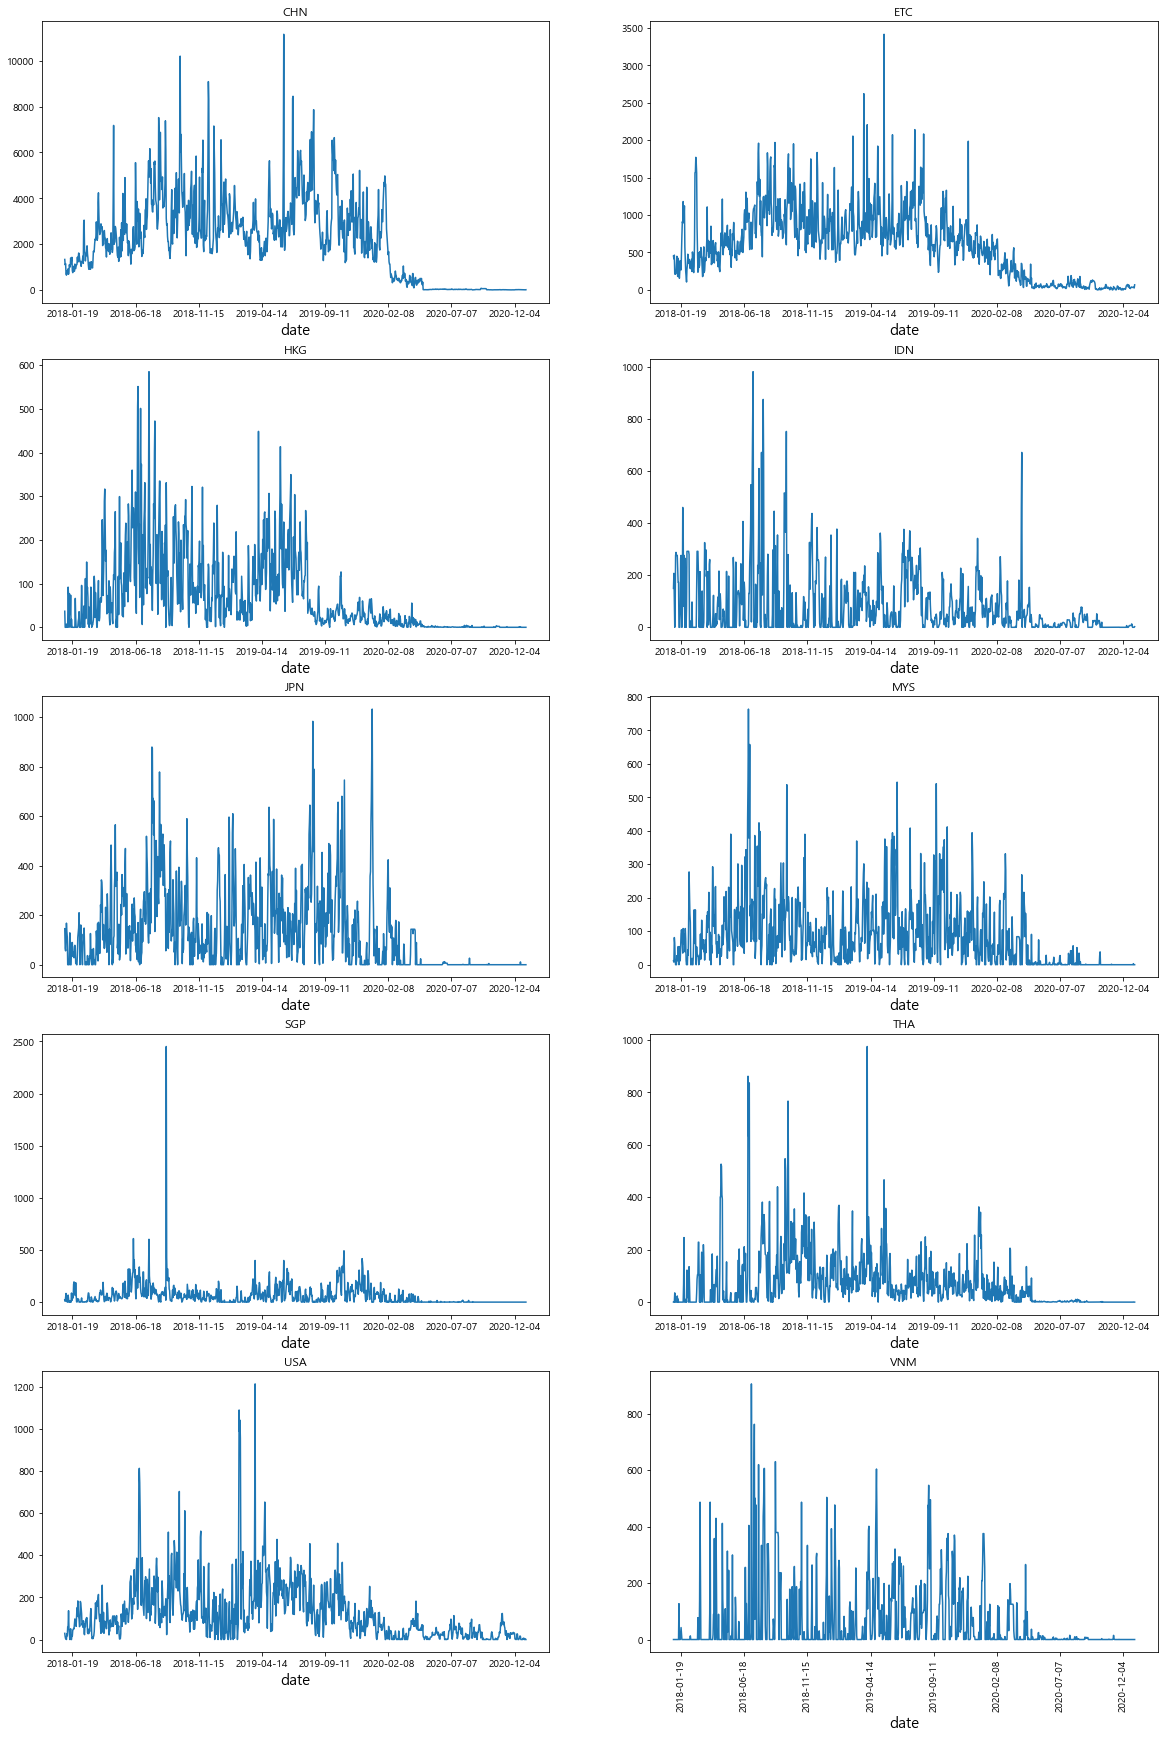

In [54]:
fig = plt.figure(figsize=(20,30))
ax1 = fig.add_subplot(5, 2, 1)
ax1.plot(한림읍_train['base_date'],한림읍_train['CHN_visit_pop_cnt'])
ax1.set_xlabel('date', fontsize = 15)
ax1.xaxis.set_major_locator(plt.MaxNLocator(10))
plt.title('CHN')
ax2 = fig.add_subplot(5, 2, 2)
ax2.plot(한림읍_train['base_date'],한림읍_train['ETC_visit_pop_cnt'])
ax2.set_xlabel('date', fontsize = 15)
ax2.xaxis.set_major_locator(plt.MaxNLocator(10))
plt.title('ETC')
ax3 = fig.add_subplot(5, 2, 3)
ax3.plot(한림읍_train['base_date'],한림읍_train['HKG_visit_pop_cnt'])
ax3.set_xlabel('date', fontsize = 15)
ax3.xaxis.set_major_locator(plt.MaxNLocator(10))
plt.title('HKG')
ax4 = fig.add_subplot(5, 2, 4)
ax4.plot(한림읍_train['base_date'],한림읍_train['IDN_visit_pop_cnt'])
ax4.set_xlabel('date', fontsize = 15)
ax4.xaxis.set_major_locator(plt.MaxNLocator(10))
plt.title('IDN')
ax5 = fig.add_subplot(5, 2, 5)
ax5.plot(한림읍_train['base_date'],한림읍_train['JPN_visit_pop_cnt'])
ax5.set_xlabel('date', fontsize = 15)
ax5.xaxis.set_major_locator(plt.MaxNLocator(10))
plt.title('JPN')
ax6 = fig.add_subplot(5, 2, 6)
ax6.plot(한림읍_train['base_date'],한림읍_train['MYS_visit_pop_cnt'])
ax6.set_xlabel('date', fontsize = 15)
ax6.xaxis.set_major_locator(plt.MaxNLocator(10))
plt.title('MYS')
ax7 = fig.add_subplot(5, 2, 7)
ax7.plot(한림읍_train['base_date'],한림읍_train['SGP_visit_pop_cnt'])
ax7.set_xlabel('date', fontsize = 15)
ax7.xaxis.set_major_locator(plt.MaxNLocator(10))
plt.title('SGP')
ax8 = fig.add_subplot(5, 2, 8)
ax8.plot(한림읍_train['base_date'],한림읍_train['THA_visit_pop_cnt'])
ax8.set_xlabel('date', fontsize = 15)
ax8.xaxis.set_major_locator(plt.MaxNLocator(10))
plt.title('THA')
ax9 = fig.add_subplot(5, 2, 9)
ax9.plot(한림읍_train['base_date'],한림읍_train['USA_visit_pop_cnt'])
ax9.set_xlabel('date', fontsize = 15)
ax9.xaxis.set_major_locator(plt.MaxNLocator(10))
plt.title('USA')
ax10 = fig.add_subplot(5, 2, 10)
ax10.plot(한림읍_train['base_date'],한림읍_train['VNM_visit_pop_cnt'])
ax10.set_xlabel('date', fontsize = 15)
ax10.xaxis.set_major_locator(plt.MaxNLocator(10))
plt.title('VNM')
plt.xticks(rotation='vertical')
plt.show()

In [72]:
train_inf.shape

(1096, 10)

In [90]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
train_inf_scaled = sc.fit_transform(train_inf)

In [91]:
# Creating a data structure with 60 timesteps and 1 output
X_train = []
y_train = []
for i in range(60, 1096):
    X_train.append(train_inf_scaled[i-60:i, :])
    y_train.append(train_inf_scaled[i, :])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train.shape

(1036, 60, 10)

In [93]:
# Part 2 - Building the RNN

# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [94]:
Model = Sequential()
Model.add(LSTM(units = 100, return_sequences = True, input_shape = (X_train.shape[1], 10)))
Model.add(Dropout(0.2))
Model.add(LSTM(units = 200, return_sequences = True))
Model.add(Dropout(0.2))
Model.add(LSTM(units = 250, return_sequences = True))
Model.add(Dropout(0.2))
Model.add(LSTM(units = 100))
Model.add(Dropout(0.2))
Model.add(Dense(units = 10))

In [95]:
Model.compile(optimizer = 'adam', loss = 'mean_squared_error')

Model.fit(X_train, y_train, epochs = 500, batch_size = 20)

Epoch 1/500
52/52 [==============================] - 11s 99ms/step - loss: 0.0152
Epoch 2/500
52/52 [==============================] - 5s 99ms/step - loss: 0.0122
Epoch 3/500
52/52 [==============================] - 5s 102ms/step - loss: 0.0109
Epoch 4/500
52/52 [==============================] - 5s 101ms/step - loss: 0.0103
Epoch 5/500
52/52 [==============================] - 5s 101ms/step - loss: 0.0104
Epoch 6/500
52/52 [==============================] - 5s 101ms/step - loss: 0.0098 1s
Epoch 7/500
52/52 [==============================] - 5s 96ms/step - loss: 0.0105: 1s - loss: - ETA: 0s - l
Epoch 8/500
52/52 [==============================] - 5s 101ms/step - loss: 0.0105
Epoch 9/500
52/52 [==============================] - 5s 102ms/step - loss: 0.0104
Epoch 10/500
52/52 [==============================] - 5s 103ms/step - loss: 0.0099
Epoch 11/500
52/52 [==============================] - 5s 100ms/step - loss: 0.0091
Epoch 12/500
52/52 [==============================] - 5s 94ms/step - 

52/52 [==============================] - 5s 93ms/step - loss: 0.0037
Epoch 101/500
52/52 [==============================] - 5s 92ms/step - loss: 0.0036
Epoch 102/500
52/52 [==============================] - 5s 96ms/step - loss: 0.0035
Epoch 103/500
52/52 [==============================] - 5s 93ms/step - loss: 0.0039
Epoch 104/500
52/52 [==============================] - 5s 93ms/step - loss: 0.0035
Epoch 105/500
52/52 [==============================] - 5s 94ms/step - loss: 0.0034
Epoch 106/500
52/52 [==============================] - 5s 93ms/step - loss: 0.0033
Epoch 107/500
52/52 [==============================] - 5s 94ms/step - loss: 0.0035
Epoch 108/500
52/52 [==============================] - 5s 92ms/step - loss: 0.0035
Epoch 109/500
52/52 [==============================] - 5s 93ms/step - loss: 0.0039
Epoch 110/500
52/52 [==============================] - 5s 93ms/step - loss: 0.0039
Epoch 111/500
52/52 [==============================] - 5s 93ms/step - loss: 0.0035
Epoch 112/500
52/5

52/52 [==============================] - 5s 91ms/step - loss: 0.0024
Epoch 199/500
52/52 [==============================] - 5s 91ms/step - loss: 0.0017
Epoch 200/500
52/52 [==============================] - 5s 91ms/step - loss: 0.0019
Epoch 201/500
52/52 [==============================] - 5s 91ms/step - loss: 0.0019
Epoch 202/500
52/52 [==============================] - 5s 91ms/step - loss: 0.0017
Epoch 203/500
52/52 [==============================] - 5s 91ms/step - loss: 0.0015
Epoch 204/500
52/52 [==============================] - 5s 91ms/step - loss: 0.0016: 1s 
Epoch 205/500
52/52 [==============================] - 5s 92ms/step - loss: 0.0017
Epoch 206/500
52/52 [==============================] - 5s 91ms/step - loss: 0.0016
Epoch 207/500
52/52 [==============================] - 5s 91ms/step - loss: 0.0017
Epoch 208/500
52/52 [==============================] - 5s 91ms/step - loss: 0.0015
Epoch 209/500
52/52 [==============================] - 5s 91ms/step - loss: 0.0015
Epoch 210/500

52/52 [==============================] - 5s 93ms/step - loss: 9.8186e-04
Epoch 296/500
52/52 [==============================] - 5s 93ms/step - loss: 9.8204e-04
Epoch 297/500
52/52 [==============================] - 5s 93ms/step - loss: 9.5459e-04
Epoch 298/500
52/52 [==============================] - 5s 93ms/step - loss: 9.9924e-04
Epoch 299/500
52/52 [==============================] - 5s 93ms/step - loss: 9.9428e-04
Epoch 300/500
52/52 [==============================] - 5s 93ms/step - loss: 0.0010
Epoch 301/500
52/52 [==============================] - 5s 93ms/step - loss: 0.0010
Epoch 302/500
52/52 [==============================] - 5s 94ms/step - loss: 0.0010
Epoch 303/500
52/52 [==============================] - 5s 93ms/step - loss: 9.9784e-04
Epoch 304/500
52/52 [==============================] - 5s 93ms/step - loss: 0.0011
Epoch 305/500
52/52 [==============================] - 5s 99ms/step - loss: 9.9566e-04
Epoch 306/500
52/52 [==============================] - 5s 94ms/step - los

52/52 [==============================] - 5s 95ms/step - loss: 9.8457e-04
Epoch 391/500
52/52 [==============================] - 5s 94ms/step - loss: 9.0647e-04
Epoch 392/500
52/52 [==============================] - 5s 94ms/step - loss: 0.0010
Epoch 393/500
52/52 [==============================] - 5s 94ms/step - loss: 8.8759e-04: 1s - l
Epoch 394/500
52/52 [==============================] - 5s 94ms/step - loss: 8.9215e-04
Epoch 395/500
52/52 [==============================] - 5s 94ms/step - loss: 8.1639e-04
Epoch 396/500
52/52 [==============================] - 5s 94ms/step - loss: 8.6097e-04
Epoch 397/500
52/52 [==============================] - 5s 94ms/step - loss: 9.1432e-04
Epoch 398/500
52/52 [==============================] - 5s 94ms/step - loss: 9.8575e-04
Epoch 399/500
52/52 [==============================] - 5s 95ms/step - loss: 7.8204e-04
Epoch 400/500
52/52 [==============================] - 5s 94ms/step - loss: 7.8563e-04
Epoch 401/500
52/52 [==============================] 

52/52 [==============================] - 5s 94ms/step - loss: 7.3591e-04
Epoch 485/500
52/52 [==============================] - 5s 94ms/step - loss: 6.8120e-04
Epoch 486/500
52/52 [==============================] - 5s 94ms/step - loss: 7.6953e-04
Epoch 487/500
52/52 [==============================] - 5s 94ms/step - loss: 7.5872e-04
Epoch 488/500
52/52 [==============================] - 5s 94ms/step - loss: 8.0932e-04
Epoch 489/500
52/52 [==============================] - 5s 94ms/step - loss: 6.9268e-04
Epoch 490/500
52/52 [==============================] - 5s 94ms/step - loss: 8.8618e-04
Epoch 491/500
52/52 [==============================] - 5s 94ms/step - loss: 9.1832e-04
Epoch 492/500
52/52 [==============================] - 5s 94ms/step - loss: 8.2782e-04
Epoch 493/500
52/52 [==============================] - 5s 94ms/step - loss: 8.0323e-04
Epoch 494/500
52/52 [==============================] - 5s 94ms/step - loss: 7.7341e-04
Epoch 495/500
52/52 [==============================] - 5s

In [96]:
# Getting the predicted stock price of 2017
한림읍_total = pd.concat((한림읍_train, 한림읍_test), axis = 0).drop(['base_date', 'emd_nm'], axis=1)
inputs = 한림읍_total[len(한림읍_total) - len(한림읍_test) - 60:].values
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 241):
    X_test.append(inputs[i-60:i, :])
X_test = np.array(X_test)
#X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 10))
pred_inf = Model.predict(X_test)
pred_inf = sc.inverse_transform(pred_inf)
X_test.shape

(181, 60, 10)

In [97]:
pred_inf.shape

(181, 10)

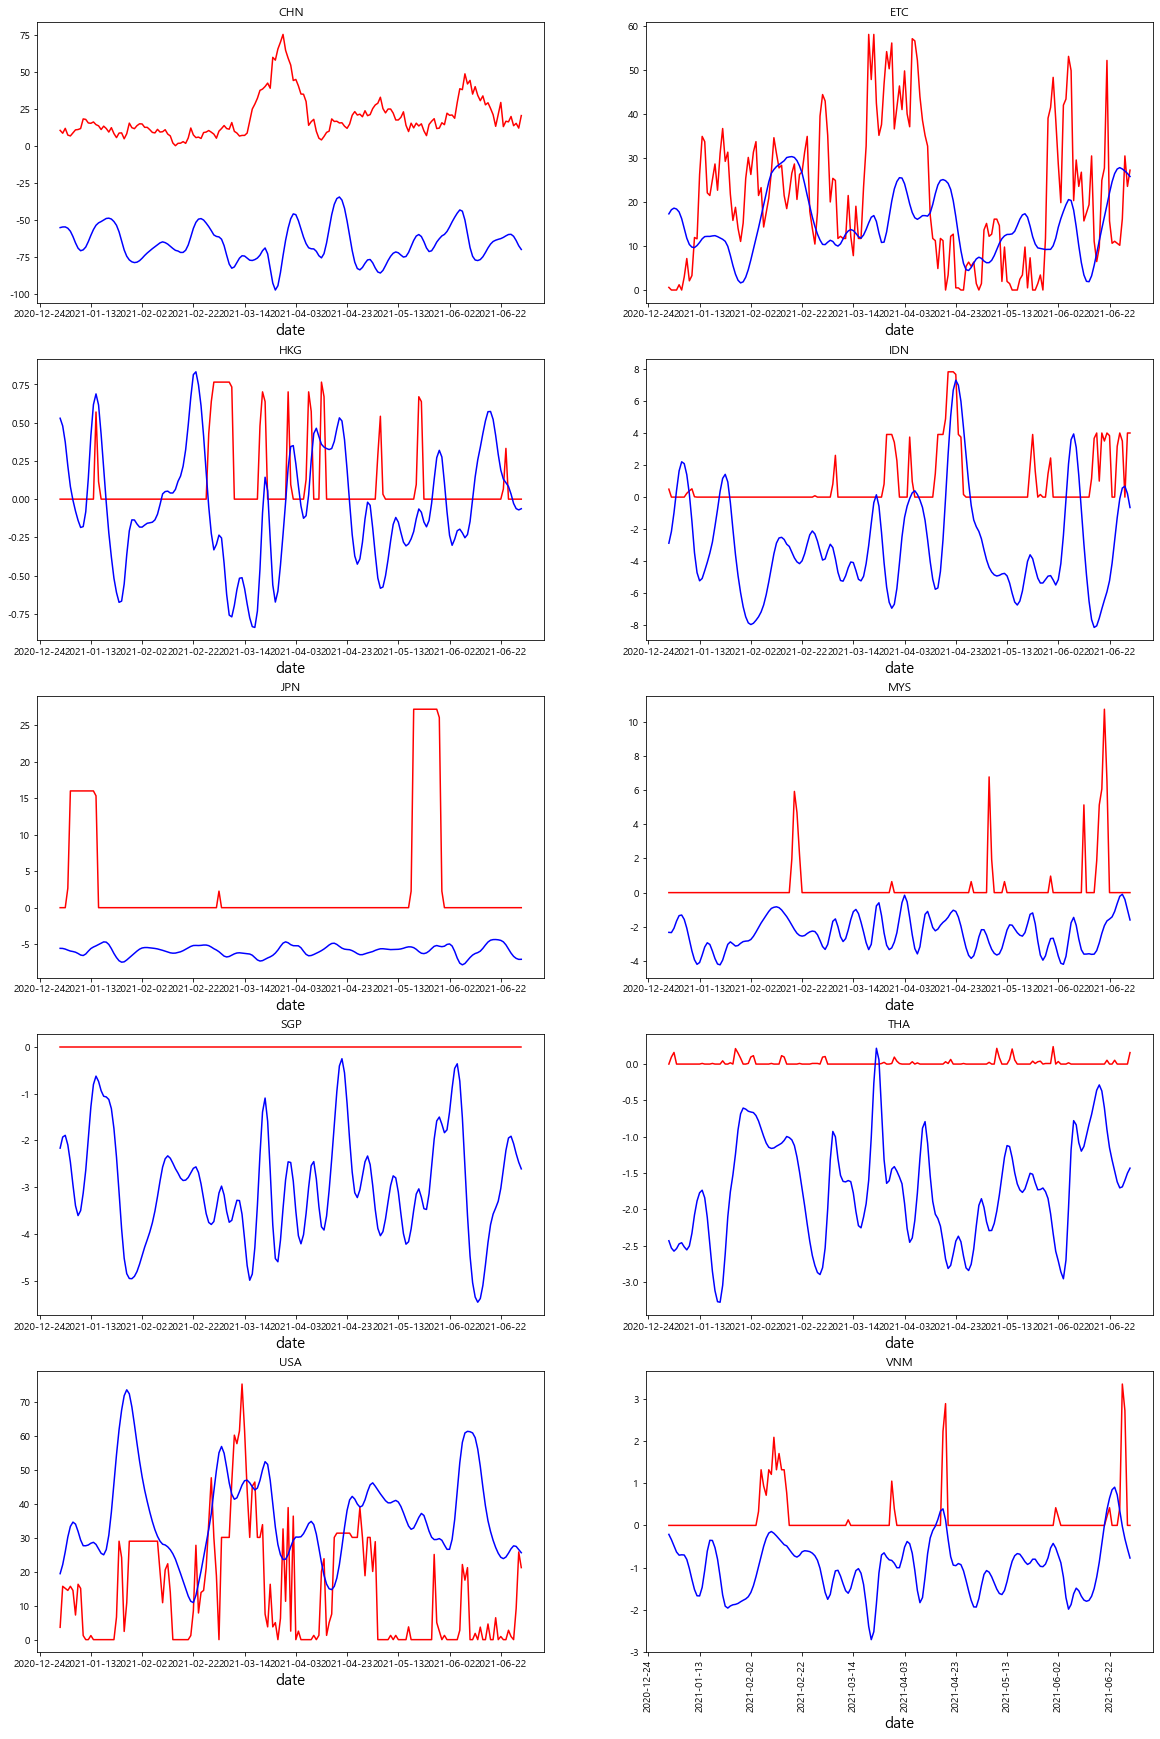

In [99]:
fig2 = plt.figure(figsize=(20,30))
bx1 = fig2.add_subplot(5, 2, 1)
bx1.plot(한림읍_test['base_date'], 한림읍_test['CHN_visit_pop_cnt'], color = 'red', label = 'Real')
bx1.plot(한림읍_test['base_date'], pred_inf[:,0], color = 'blue', label = 'Predicted by Model 1')
bx1.set_xlabel('date', fontsize = 15)
bx1.xaxis.set_major_locator(plt.MaxNLocator(10))
plt.title('CHN')
bx2 = fig2.add_subplot(5, 2, 2)
bx2.plot(한림읍_test['base_date'], 한림읍_test['ETC_visit_pop_cnt'], color = 'red', label = 'Real')
bx2.plot(한림읍_test['base_date'], pred_inf[:,1], color = 'blue', label = 'Predicted by Model 1')
bx2.set_xlabel('date', fontsize = 15)
bx2.xaxis.set_major_locator(plt.MaxNLocator(10))
plt.title('ETC')
bx3 = fig2.add_subplot(5, 2, 3)
bx3.plot(한림읍_test['base_date'], 한림읍_test['HKG_visit_pop_cnt'], color = 'red', label = 'Real')
bx3.plot(한림읍_test['base_date'], pred_inf[:,2], color = 'blue', label = 'Predicted by Model 1')
bx3.set_xlabel('date', fontsize = 15)
bx3.xaxis.set_major_locator(plt.MaxNLocator(10))
plt.title('HKG')
bx4 = fig2.add_subplot(5, 2, 4)
bx4.plot(한림읍_test['base_date'], 한림읍_test['IDN_visit_pop_cnt'], color = 'red', label = 'Real')
bx4.plot(한림읍_test['base_date'], pred_inf[:,3], color = 'blue', label = 'Predicted by Model 1')
bx4.set_xlabel('date', fontsize = 15)
bx4.xaxis.set_major_locator(plt.MaxNLocator(10))
plt.title('IDN')
bx5 = fig2.add_subplot(5, 2, 5)
bx5.plot(한림읍_test['base_date'], 한림읍_test['JPN_visit_pop_cnt'], color = 'red', label = 'Real')
bx5.plot(한림읍_test['base_date'], pred_inf[:,4], color = 'blue', label = 'Predicted by Model 1')
bx5.set_xlabel('date', fontsize = 15)
bx5.xaxis.set_major_locator(plt.MaxNLocator(10))
plt.title('JPN')
bx6 = fig2.add_subplot(5, 2, 6)
bx6.plot(한림읍_test['base_date'], 한림읍_test['MYS_visit_pop_cnt'], color = 'red', label = 'Real')
bx6.plot(한림읍_test['base_date'], pred_inf[:,5], color = 'blue', label = 'Predicted by Model 1')
bx6.set_xlabel('date', fontsize = 15)
bx6.xaxis.set_major_locator(plt.MaxNLocator(10))
plt.title('MYS')
bx7 = fig2.add_subplot(5, 2, 7)
bx7.plot(한림읍_test['base_date'], 한림읍_test['SGP_visit_pop_cnt'], color = 'red', label = 'Real')
bx7.plot(한림읍_test['base_date'], pred_inf[:,6], color = 'blue', label = 'Predicted by Model 1')
bx7.set_xlabel('date', fontsize = 15)
bx7.xaxis.set_major_locator(plt.MaxNLocator(10))
plt.title('SGP')
bx8 = fig2.add_subplot(5, 2, 8)
bx8.plot(한림읍_test['base_date'], 한림읍_test['THA_visit_pop_cnt'], color = 'red', label = 'Real')
bx8.plot(한림읍_test['base_date'], pred_inf[:,7], color = 'blue', label = 'Predicted by Model 1')
bx8.set_xlabel('date', fontsize = 15)
bx8.xaxis.set_major_locator(plt.MaxNLocator(10))
plt.title('THA')
bx9 = fig2.add_subplot(5, 2, 9)
bx9.plot(한림읍_test['base_date'], 한림읍_test['USA_visit_pop_cnt'], color = 'red', label = 'Real')
bx9.plot(한림읍_test['base_date'], pred_inf[:,8], color = 'blue', label = 'Predicted by Model 1')
bx9.set_xlabel('date', fontsize = 15)
bx9.xaxis.set_major_locator(plt.MaxNLocator(10))
plt.title('USA')
bx10 = fig2.add_subplot(5, 2, 10)
bx10.plot(한림읍_test['base_date'], 한림읍_test['VNM_visit_pop_cnt'], color = 'red', label = 'Real')
bx10.plot(한림읍_test['base_date'], pred_inf[:,9], color = 'blue', label = 'Predicted by Model 1')
bx10.set_xlabel('date', fontsize = 15)
bx10.xaxis.set_major_locator(plt.MaxNLocator(10))
plt.title('VNM')
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
def root_MSE(x,y):
    root = 0
    for i in range(0,len(x)):
        root += (x[i]-y[i])**2
    root = math.sqrt(root / len(x))
    return root